<a href="https://colab.research.google.com/github/EstebanAG1005/Laboratorio7-DS/blob/main/Laboratorio7_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# !pip install -q autogluon

In [16]:
import autogluon.core as ag
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [17]:
from google.colab import drive
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

path_data = "/content/drive/MyDrive/diabetes.csv"

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Outcome'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Inspección básica de los datos
display(data.head())
display(data.describe().transpose())

# Reemplazo de ceros en las columnas específicas con la mediana,
# estratificada por 'Outcome'
cols_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
medians = data.groupby('Outcome')[cols_replace_zero].median()

# Mostrar medianas antes del reemplazo de ceros
print("Valores medianos utilizados para la imputación de ceros:")
display(medians.transpose())

# Reemplazo de ceros
for col in cols_replace_zero:
    data.loc[(data['Outcome'] == 0) & (data[col] == 0), col] = medians.loc[0, col]
    data.loc[(data['Outcome'] == 1) & (data[col] == 0), col] = medians.loc[1, col]

# Validar la sustitución mostrando el nuevo resumen de los datos
print("\nDatos después de la imputación de ceros:")
display(data.describe().transpose())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,39.0,26.6,0.351,31,0
2,8,183,64,27,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.378906,12.104431,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.430990,9.321460,7.000,21.00000,27.0000,32.00000,99.00
Insulin,768.0,91.783854,108.121136,0.000,39.00000,39.0000,127.25000,846.00
BMI,768.0,32.433919,6.880664,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Valores medianos utilizados para la imputación de ceros:


Outcome,0,1
Glucose,107.000,140.000
BloodPressure,70.000,74.000
SkinThickness,21.000,27.000
Insulin,39.500,0.000
BMI,30.075,34.275



Datos después de la imputación de ceros:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.378906,12.104431,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.430990,9.321460,7.000,21.00000,27.0000,32.00000,99.00
Insulin,768.0,91.783854,108.121136,0.000,39.00000,39.0000,127.25000,846.00
BMI,768.0,32.433919,6.880664,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [19]:
# Especificar la columna objetivo y la métrica de evaluación
label = 'Outcome'
metric = 'accuracy'

# Configurar y entrenar el predictor
predictor = TabularPredictor(label=label, eval_metric=metric).fit(
    train_data, presets='best_quality'
)

# Mostrar el leaderboard
leaderboard = predictor.leaderboard()
print(leaderboard)


No path specified. Models will be saved in: "AutogluonModels/ag-20231015_180459/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231015_180459/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   48.31 GB / 83.96 GB (57.5%)
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, clas

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           LightGBM_BAG_L1   0.910423       0.030665  14.788613                0.030665          14.788613            1       True          4
1       WeightedEnsemble_L2   0.910423       0.034177  16.693846                0.003512           1.905233            2       True         14
2           CatBoost_BAG_L1   0.905537       0.007163  12.934508                0.007163          12.934508            1       True          7
3            XGBoost_BAG_L1   0.900651       0.048654   8.826822                0.048654           8.826822            1       True         11
4      LightGBMLarge_BAG_L1   0.895765       0.018905  16.691965                0.018905          16.691965            1       True         13
5         LightGBMXT_BAG_L1   0.889251       0.021358  16.292079                0.021358          16.292079            1       True          3

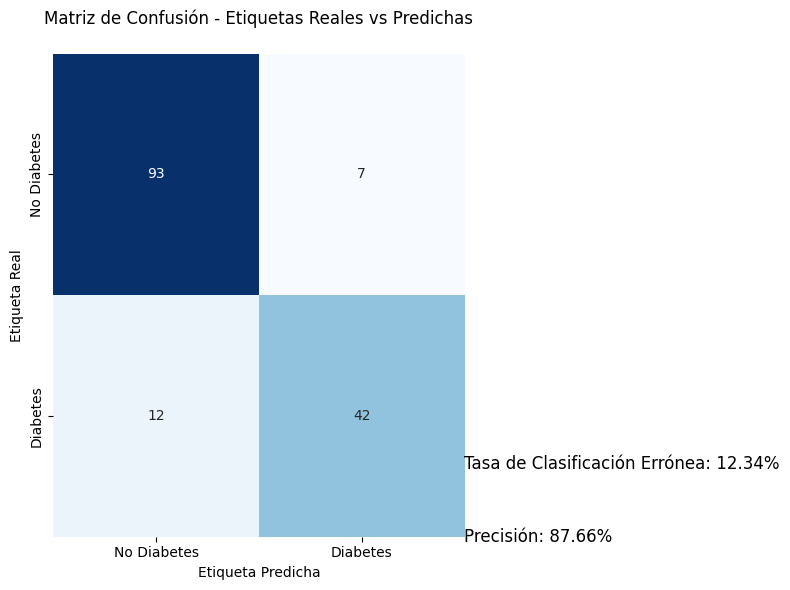

In [20]:
# Obtener las predicciones y los valores reales del conjunto de prueba
y_pred = predictor.predict(test_data)
y_true = test_data[label]

# Calcular y visualizar la matriz de confusión
conf_mat = confusion_matrix(y_true, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión - Etiquetas Reales vs Predichas\n')

# Añadir texto explicativo
plt.text(2,2, f'Precisión: {((conf_mat[0,0]+conf_mat[1,1])/conf_mat.sum()*100):.2f}%',
         fontsize=12, verticalalignment='center')
plt.text(2,1.7, f'Tasa de Clasificación Errónea: {((conf_mat[0,1]+conf_mat[1,0])/conf_mat.sum()*100):.2f}%',
         fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.show()
